# #1: IMPORTING DATA

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#setting working directory
%cd "C:\Users\vigil\Downloads\Fashion_mnist_datasets"

C:\Users\vigil\Downloads\Fashion_mnist_datasets


In [16]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv')

# #2: VISUALIZATION OF DATASET

In [17]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
fashion_train_df.shape

(60000, 785)

In [20]:
fashion_test_df.shape

(10000, 785)

In [21]:
training = np.array(fashion_train_df, dtype = 'float32')

In [22]:
testing = np.array(fashion_test_df, dtype = 'float32')

8.0

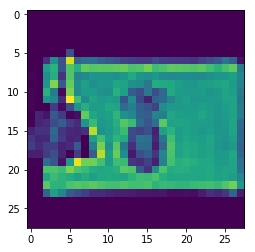

In [23]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28,28))
label = training[i,0]
label

# #3: TRAINING THE MODEL

In [24]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

In [25]:
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 25)

In [28]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [29]:
X_train.shape

(48000, 28, 28, 1)

In [30]:
X_test.shape

(10000, 28, 28, 1)

In [31]:
X_validate.shape

(12000, 28, 28, 1)

In [32]:
import keras

Using TensorFlow backend.


In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [36]:
cnn_model = Sequential()

In [37]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))

C:\Users\vigil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [38]:
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

In [39]:
cnn_model.add(Flatten())

In [41]:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

C:\Users\vigil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [42]:
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

C:\Users\vigil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [44]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr=0.001), metrics = ['accuracy'])

In [47]:
epochs = 50

In [49]:
cnn_model.fit(X_train, y_train, batch_size = 512, nb_epoch = epochs, verbose = 1, validation_data = (X_validate, y_validate))

C:\Users\vigil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 35s 733us/step - loss: 1.0043 - acc: 0.6463 - val_loss: 0.5543 - val_acc: 0.8029
Epoch 2/50
48000/48000 [==============================] - 30s 626us/step - loss: 0.5051 - acc: 0.8199 - val_loss: 0.4576 - val_acc: 0.8401
Epoch 3/50
48000/48000 [==============================] - 30s 620us/step - loss: 0.4359 - acc: 0.8441 - val_loss: 0.4251 - val_acc: 0.8501
Epoch 4/50
48000/48000 [==============================] - 30s 634us/step - loss: 0.3977 - acc: 0.8609 - val_loss: 0.3947 - val_acc: 0.8677
Epoch 5/50
48000/48000 [==============================] - 30s 631us/step - loss: 0.3647 - acc: 0.8731 - val_loss: 0.3816 - val_acc: 0.8737
Epoch 6/50
48000/48000 [==============================] - 31s 648us/step - loss: 0.3485 - acc: 0.8792 - val_loss: 0.3538 - val_acc: 0.8800
Epoch 7/50
48000/48000 [==============================] - 31s 648us/step - loss: 0.3318 - acc: 0.8844 - val_loss: 0.

# #5: EVALUATING THE MODEL

In [53]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 3s 283us/step
Test accuracy : 0.912


In [54]:
predicted_classes = cnn_model.predict_classes(X_test)

In [55]:
predicted_classes

array([0, 1, 6, ..., 8, 8, 1], dtype=int64)

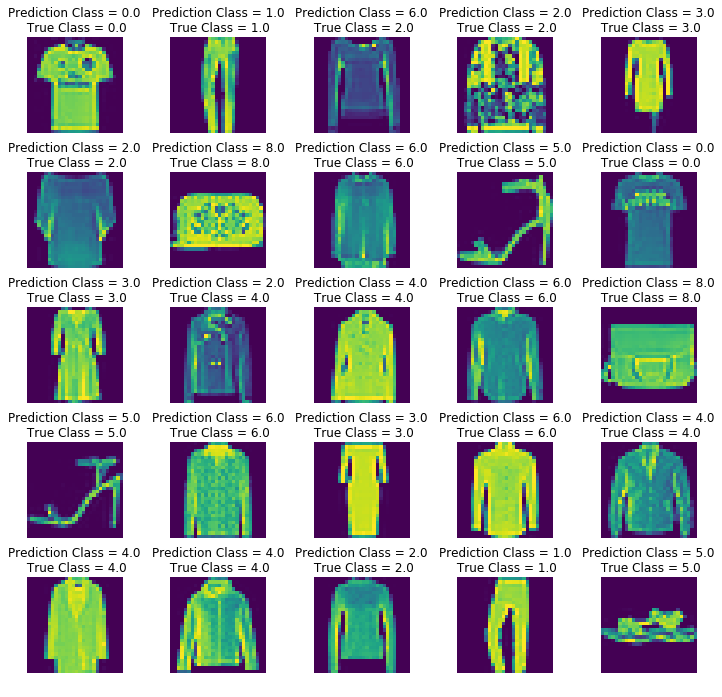

In [57]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel() #

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28, 28))
    axes[i].set_title('Prediction Class = {:0.1f}\n True Class = {:0.1f}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5)

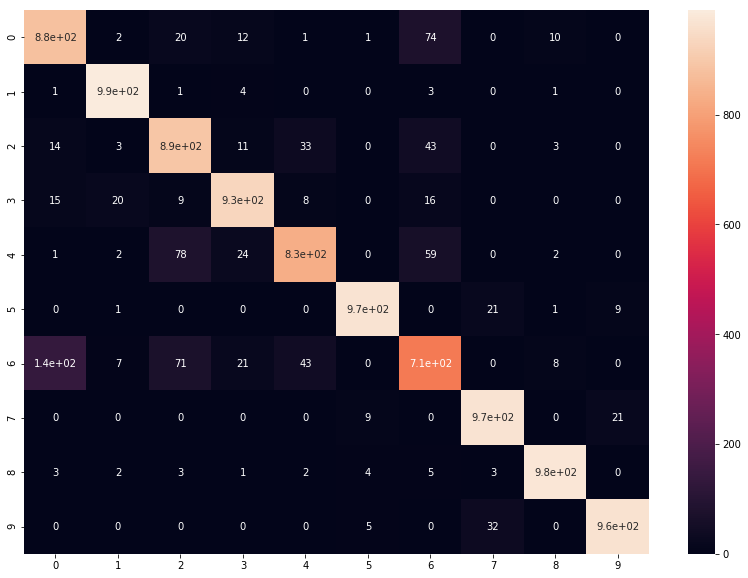

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14, 10))
sns.heatmap(cm, annot = True)

In [63]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.88      0.86      1000
     Class 1       0.96      0.99      0.98      1000
     Class 2       0.83      0.89      0.86      1000
     Class 3       0.93      0.93      0.93      1000
     Class 4       0.91      0.83      0.87      1000
     Class 5       0.98      0.97      0.97      1000
     Class 6       0.78      0.71      0.74      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.97      0.96      0.97      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

